**ПРАКТИЧЕСКАЯ РАБОТА 10. ВИЗУАЛИЗАЦИЯ ДАННЫХ**

Цели и задачи Цель лабораторной работы: изучение программных средств для визуализации наборов данных. Основные задачи: – установка и настройка matplotlib, seaborn; –изучение основных типов графиков библиотеки matplotlib; –изучение основных типов графиков библиотеки seaborn; – получение навыков анализа данных по визуальным представлениям данных.

Коршиков Иван Сергеевич ПИН-б-о-22-1 09.03.03 Прикладная информатика

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data_path = '/content/machine.data'

# Имена столбцов
names = ["VendorName",
   "ModelName",
   "MYCT",
   "MMIN",
   "MMAX",
   "CACH",
   "CHMIN",
   "CHMAX",
   "PRP",
   "ERP"]

# Чтение данных с указанием названий столбцов
data = pd.read_csv(data_path, names=names)
data.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


1.VendorName - Categorical
2.ModelName - Categorical
3.MYCT - Integer
4.MMIN - Integer
5.MMAX - Integer
6.CACH - Integer
7.CHMIN - Integer
8.CHMAX - Integer
9.PRP - Integer
10.ERP - Integer

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


array([[<Axes: title={'center': 'MYCT'}>,
        <Axes: title={'center': 'MMIN'}>,
        <Axes: title={'center': 'MMAX'}>],
       [<Axes: title={'center': 'CACH'}>,
        <Axes: title={'center': 'CHMIN'}>,
        <Axes: title={'center': 'CHMAX'}>],
       [<Axes: title={'center': 'PRP'}>, <Axes: title={'center': 'ERP'}>,
        <Axes: >]], dtype=object)

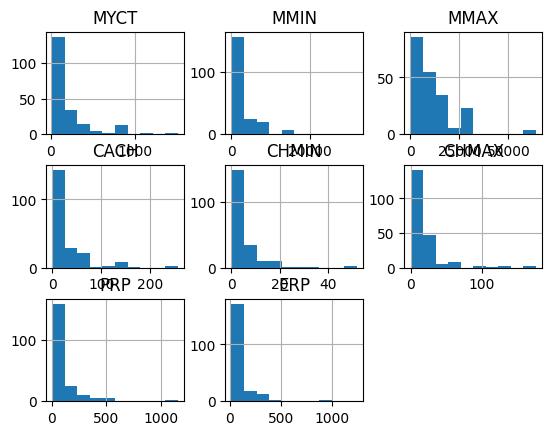

In [ ]:
data.hist()

<Axes: >

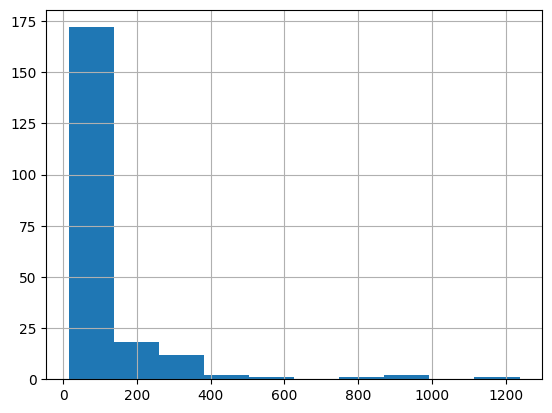

In [ ]:
data['ERP'].hist()

Из гистограмм видно колличественное соотношение различных признаков. Расчетные значения относительной производительности ERP-системы

<Axes: ylabel='ERP'>

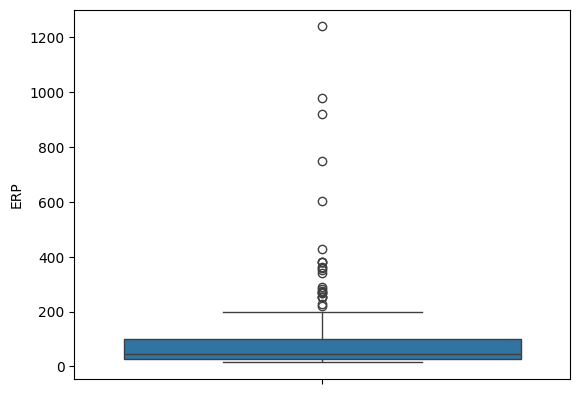

In [ ]:
sns.boxplot(data["ERP"])

         ModelName  ERP
0            32/60  199
1           470v/7  253
2          470v/7a  253
3          470v/7b  253
4          470v/7c  132
..             ...  ...
204           80/8   37
205  90/80-model-3   50
206             32   41
207         vs-100   47
208          vs-90   25

[209 rows x 2 columns]
<pandas.core.groupby.generic.DataFrameGroupBy object at 0x784db2a59f90> )))
            ERP
ModelName      
100          23
1100/61-h1   56
1100/81     182
1100/82     227
1100/83     341
...         ...
vax:11/730   28
vax:11/750   36
vax:11/780   38
vs-100       47
vs-90        25

[209 rows x 1 columns]
['100' '1100/61-h1' '1100/81' '1100/82' '1100/83' '1100/84' '1100/93'
 '1100/94' '1636-1' '1636-10']


<ipython-input-12-c6281403146a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="ModelName",


<Axes: xlabel='ERP', ylabel='ModelName'>

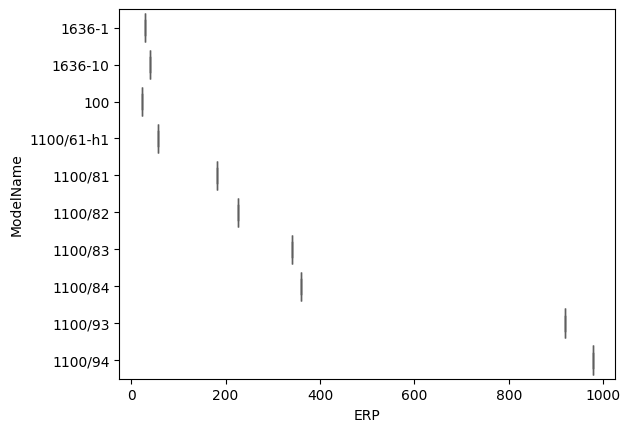

In [ ]:
top_data = data[["ModelName", "ERP"]]
print(top_data)

top_data = top_data.groupby("ModelName")
print(top_data, ")))")

top_data = top_data.sum()
print(top_data)

top_data = top_data[:10].index.values
print(top_data)

sns.boxplot(y="ModelName",
            x="ERP",
            data=data[data.ModelName.isin(top_data)], palette="Set3")

ModelName - Название Модели
ERP - ERP система. Показывает Название и предполагаемая относительная эффективность по сравнению с оригинальной статьей

<ipython-input-14-4fd749414888>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["CACH"], palette="colorblind")


<Axes: xlabel='CACH', ylabel='count'>

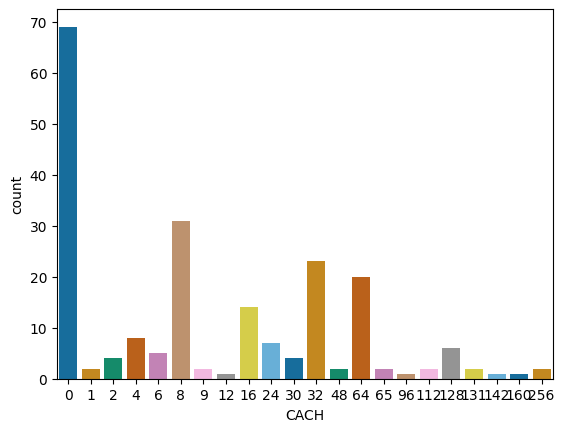

In [ ]:
sns.countplot(x= data["CACH"], palette="colorblind")

countplot считает количество элементов по категориям

<ipython-input-20-c12a8d65cc48>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "PRP",data =  data[data["PRP"].isin(data["PRP"].value_counts().head(10).index)], palette = "colorblind")


<Axes: xlabel='PRP', ylabel='count'>

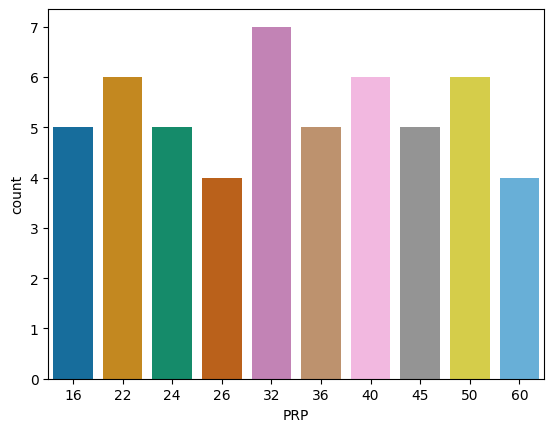

In [ ]:
sns.countplot(x= "PRP",data =  data[data["PRP"].isin(data["PRP"].value_counts().head(10).index)], palette = "colorblind")

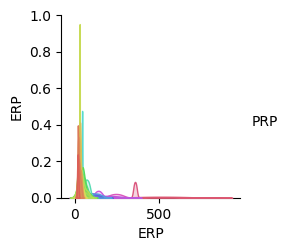

In [ ]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF"]
my_palette = sns.color_palette("hls", 116)

sns.pairplot(data=data[["VendorName", "ERP", "PRP"]], hue="PRP", palette=my_palette)

Text(0, 0.5, 'КЭШ')

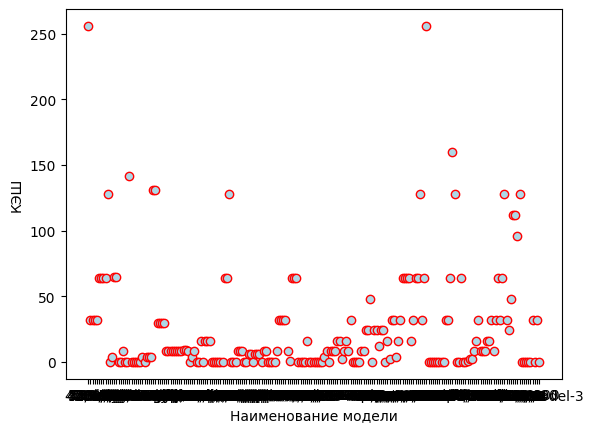

In [ ]:
plt.scatter(data["ModelName"],
            data["CACH"],
            color="lightblue", edgecolors="red")
plt.xlabel("Наименование модели")
plt.ylabel("КЭШ")

In [ ]:
data.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
print(data.columns)
data_corr = data.drop(columns=["ModelName", "VendorName"])

data_corr.corr()

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


В таблице выше виден коэффициент корреляции между всеми данными в датасете

<Axes: >

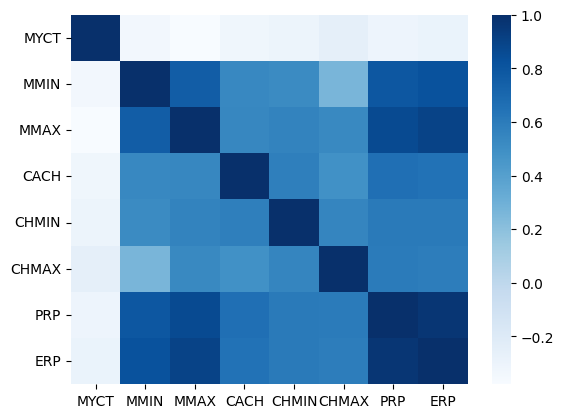

In [ ]:
sns.heatmap(data_corr.corr(), cmap=plt.cm.Blues)